In [1]:
import pandas as pd

Task 1, Data manipulation:

- Create a dataframe, called movie_performance, with dc_marvel_movie_performance.csv data and check how data looks like (play with head(), tail(), check column names etc)
- Remove MCU, Phase and Franchise columns
- Find unique values of Character Family column and print them sorted from A to Z
- Find the longest movie
- Find mean values of “Rotten Tomatoes Critic Score” per “Break Even” categories
- Add a new column to movie_performance dataframe,  called “Recommended”, which takes value:
    - “Strongly Yes” if “Rotten Tomatoes Critic Score” >= 90
    - “Yes”  if “Rotten Tomatoes Critic Score” is between 60 and 90
    - “No” if “Rotten Tomatoes Critic Score” is between 40 and 59
    - “Strongly No” if “Rotten Tomatoes Critic Score” < 40
and print percentage of films falling into each of the above categories (hint: you can check value_count function and its normalize parameter: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

- Create a new dataframe, called success_rate,  with success rate, that lists number of Flops and Successes for movies per Character Family, and calculates success rate (success rate = success/(success+flop) * 100%)
 
- Create a new dataframe, called directors, with directors.csv data and check how data looks like
- Print the result of joining movie_performance and directors dataframes, leaving only rows with Films that are present in both dataframes (you should get all the columns from movie_performance dataframe and column director from directors dataframe)
 

In [5]:
movie_performance = pd.read_csv('dc_marvel_movie_performance.csv', encoding='ISO-8859-1')

In [8]:
movie_performance

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,The Flash,16/06/2023,"$108,133,313","$162,500,000","$270,633,313","$200,000,000",False,NaN,Warner Bros.,PG-13,...,Flash,40%,1.35,63,Male,2023,"$270,633,313","$200,000,000","$500,000,000",Flop
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",False,NaN,Warner Bros.,PG-13,...,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop
110,The Marvels,11/10/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",False,NaN,Warner Bros.,PG-13,...,Aquaman,29%,2.12,35,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop


In [10]:
movie_performance.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop


In [11]:
movie_performance.tail()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
108,The Flash,16/06/2023,"$108,133,313","$162,500,000","$270,633,313","$200,000,000",False,NaN,Warner Bros.,PG-13,...,Flash,40%,1.35,63,Male,2023,"$270,633,313","$200,000,000","$500,000,000",Flop
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",False,NaN,Warner Bros.,PG-13,...,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop
110,The Marvels,11/10/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",False,NaN,Warner Bros.,PG-13,...,Aquaman,29%,2.12,35,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop
112,Madame Web,14/02/2024,"$42,619,699","$54,000,000","$96,619,699","$80,000,000",False,NaN,Columbia Pictures,PG-13,...,Spider-Man Allies and Villains,44%,1.21,13,Female,2024,"$96,619,699","$80,000,000","$200,000,000",Flop


In [13]:
movie_performance.columns

Index(['Film', 'U.S. release date',
       'Box office gross Domestic (U.S. and Canada )',
       'Box office gross Other territories', 'Box office gross Worldwide',
       'Budget', 'MCU', 'Phase', 'Distributor', 'MPAA Rating', 'Length',
       'Minutes', 'Franchise', 'Character Family', 'Domestic %',
       'Gross to Budget', 'Rotten Tomatoes Critic Score', 'Male/Female-led',
       'Year', 'Inflation Adjusted Worldwide Gross',
       'Inflation Adjusted Budget', '2.5x prod', 'Break Even'],
      dtype='object')

In [14]:
movie_performance.describe

<bound method NDFrame.describe of                              Film U.S. release date  \
0                        Superman        15/12/1978   
1                     Superman II        19/06/1981   
2                    Superman III        17/06/1983   
3                       Supergirl        21/11/1984   
4                 Howard the Duck        08/01/1986   
..                            ...               ...   
108                     The Flash        16/06/2023   
109                   Blue Beetle        18/08/2023   
110                   The Marvels        11/10/2023   
111  Aquaman and the Lost Kingdom        20/12/2023   
112                    Madame Web        14/02/2024   

    Box office gross Domestic (U.S. and Canada )  \
0                                  $134,478,449    
1                                  $108,185,706    
2                                   $59,950,623    
3                                   $14,296,438    
4                                   $16,295,7

In [15]:
movie_performance.drop(columns=['MCU', 'Phase', 'Franchise'], inplace=True)

In [16]:
movie_performance

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,Distributor,MPAA Rating,Length,Minutes,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",Warner Bros.,PG,02:23:00,143,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",Warner Bros.,PG,02:07:00,127,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",Warner Bros.,PG,02:05:00,125,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",Tri-Star Pictures,PG,02:04:00,124,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",Universal Pictures,PG,01:50:00,110,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,The Flash,16/06/2023,"$108,133,313","$162,500,000","$270,633,313","$200,000,000",Warner Bros.,PG-13,02:24:00,144,Flash,40%,1.35,63,Male,2023,"$270,633,313","$200,000,000","$500,000,000",Flop
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",Warner Bros.,PG-13,02:07:00,127,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop
110,The Marvels,11/10/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",Walt Disney Studios Motion Pictures,PG-13,01:45:00,105,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",Warner Bros.,PG-13,02:04:00,124,Aquaman,29%,2.12,35,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop


In [19]:
character_family_unique = sorted(movie_performance['Character Family'].unique())

In [20]:
character_family_unique

['Ant-Man',
 'Aquaman',
 'Avengers',
 'Batman',
 'Birds of Prey',
 'Black Panther',
 'Black Widow',
 'Blade',
 'Blue Beetle',
 'Captain America',
 'Captain Marvel',
 'Constantine',
 'Daredevil',
 'Doctor Strange',
 'Eternals',
 'Fantastic Four',
 'Flash',
 'Ghost Rider',
 'Green Lantern',
 'Guardians of the Galaxy',
 'Howard the Duck',
 'Hulk',
 'Iron Man',
 'Jonah Hex',
 'Justice League',
 'Punisher',
 'Shang-Chi',
 'Shazam',
 'Spider-Man',
 'Spider-Man Allies and Villains',
 'Suicide Squad',
 'Superman',
 'Swamp Thing',
 'Teen Titans',
 'Thor',
 'Watchmen',
 'Wonder Woman',
 'X-Men']

In [33]:
movie_performance.loc[movie_performance['Minutes'].idxmax()]

Film                                                              Avengers: Endgame
U.S. release date                                                        26/04/2019
Box office gross Domestic (U.S. and Canada )                          $858,373,000 
Box office gross Other territories                                  $1,941,066,100 
Box office gross Worldwide                                          $2,799,439,100 
Budget                                                                $356,000,000 
Distributor                                     Walt Disney Studios Motion Pictures
MPAA Rating                                                                   PG-13
Length                                                                     03:01:00
Minutes                                                                         181
Character Family                                                           Avengers
Domestic %                                                                  

In [38]:
mean_values = movie_performance.groupby('Break Even')['Rotten Tomatoes Critic Score'].mean()
mean_values

Break Even
Flop       42.361702
Success    76.727273
Name: Rotten Tomatoes Critic Score, dtype: float64

In [42]:
import numpy as np
conditions = [
    (movie_performance['Rotten Tomatoes Critic Score'] >= 90),
    (movie_performance['Rotten Tomatoes Critic Score'].between(60, 89)),
    (movie_performance['Rotten Tomatoes Critic Score'].between(40, 59)),
    (movie_performance['Rotten Tomatoes Critic Score'] < 40)
]
choices = ['Strongly Yes', 'Yes', 'No', 'Strongly No']
movie_performance['Recommended'] = np.select(conditions, choices)

In [43]:
movie_performance

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,Distributor,MPAA Rating,Length,Minutes,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,Recommended
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",Warner Bros.,PG,02:23:00,143,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success,Strongly Yes
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",Warner Bros.,PG,02:07:00,127,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success,Yes
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",Warner Bros.,PG,02:05:00,125,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop,Strongly No
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",Tri-Star Pictures,PG,02:04:00,124,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop,Strongly No
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",Universal Pictures,PG,01:50:00,110,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop,Strongly No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,The Flash,16/06/2023,"$108,133,313","$162,500,000","$270,633,313","$200,000,000",Warner Bros.,PG-13,02:24:00,144,Flash,40%,1.35,63,Male,2023,"$270,633,313","$200,000,000","$500,000,000",Flop,Yes
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",Warner Bros.,PG-13,02:07:00,127,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop,Yes
110,The Marvels,11/10/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",Walt Disney Studios Motion Pictures,PG-13,01:45:00,105,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop,Yes
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",Warner Bros.,PG-13,02:04:00,124,Aquaman,29%,2.12,35,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop,Strongly No


In [47]:
print(movie_performance['Recommended'].value_counts(normalize=True))

Recommended
Yes             0.389381
Strongly No     0.265487
Strongly Yes    0.212389
No              0.132743
Name: proportion, dtype: float64


In [49]:
success_rate = movie_performance.pivot_table(index='Character Family', columns='Break Even', aggfunc='size', fill_value=0)
success_rate['Success Rate'] = (success_rate['Success'] / (success_rate['Flop'] + success_rate['Success'])) * 100
success_rate[['Flop', 'Success', 'Success Rate']]

Break Even,Flop,Success,Success Rate
Character Family,,,
Ant-Man,1,2,66.666667
Aquaman,1,1,50.000000
Avengers,0,4,100.000000
Batman,3,9,75.000000
Birds of Prey,1,0,0.000000
Black Panther,0,2,100.000000
Black Widow,1,0,0.000000
Blade,1,2,66.666667
Blue Beetle,1,0,0.000000


In [58]:
directors = pd.read_csv('directors.csv')

In [59]:
directors

,Movie,Director
0,Man of Steel,Zack Snyder
1,Steel,Kenneth Johnson
2,Superman,Richard Donner
3,Superman III,Richard Lester
4,Superman II,Richard Lester
5,Supergirl,Jeannot Szwarc
6,Superman IV: The Quest for Peace,Sidney J. Furie
7,Superman Returns,Bryan Singer
8,Wonder Woman,Patty Jenkins
9,Wonder Woman 1984,Patty Jenkins


In [56]:
combined_data = pd.merge(movie_performance, directors, left_on='Film', right_on='Movie', how='inner')

In [57]:
combined_data

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,Distributor,MPAA Rating,Length,Minutes,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,Recommended,Movie,Director
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",Warner Bros.,PG,02:23:00,143,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success,Strongly Yes,Superman,Richard Donner
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",Warner Bros.,PG,02:07:00,127,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success,Yes,Superman II,Richard Lester
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",Warner Bros.,PG,02:05:00,125,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop,Strongly No,Superman III,Richard Lester
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",Tri-Star Pictures,PG,02:04:00,124,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop,Strongly No,Supergirl,Jeannot Szwarc
4,Superman IV: The Quest for Peace,24/07/1987,"$15,681,020","$14,600,000","$30,281,020","$17,000,000",Warner Bros.,PG,01:30:00,90,Superman,52%,1.78,10,Male,1987,"$81,220,728","$45,597,948","$42,500,000",Flop,Strongly No,Superman IV: The Quest for Peace,Sidney J. Furie
5,Steel,15/08/1997,"$1,710,972","$91,000","$1,801,972","$16,000,000",Warner Bros.,PG-13,01:37:00,97,Superman,95%,0.11,12,Male,1997,"$3,420,958","$30,375,236","$40,000,000",Flop,Strongly No,Steel,Kenneth Johnson
6,Superman Returns,28/06/2006,"$200,081,192","$191,000,000","$391,081,192","$270,000,000",Warner Bros.,PG-13,02:34:00,154,Superman,51%,1.45,74,Male,2006,"$591,086,599","$408,082,478","$675,000,000",Flop,Yes,Superman Returns,Bryan Singer
7,Man of Steel,14/06/2013,"$291,045,518","$379,100,000","$670,145,518","$225,000,000",Warner Bros.,PG-13,02:23:00,143,Superman,43%,2.98,56,Male,2013,"$876,532,581","$294,294,038","$562,500,000",Success,No,Man of Steel,Zack Snyder
8,Wonder Woman,06/02/2017,"$412,845,172","$411,125,510","$823,970,682","$149,000,000",Warner Bros.,PG-13,02:21:00,141,Wonder Woman,50%,5.53,93,Female,2017,"$1,024,254,126","$185,217,591","$372,500,000",Success,Strongly Yes,Wonder Woman,Patty Jenkins
9,Wonder Woman 1984,25/12/2020,"$46,801,036","$122,800,000","$169,601,036","$200,000,000",Warner Bros.,PG-13,02:31:00,151,Wonder Woman,28%,0.85,58,Female,2020,"$199,673,523","$235,462,622","$500,000,000",Flop,No,Wonder Woman 1984,Patty Jenkins


Task 2,  Data visualization:

- Please find top 5 films in movie_performance dataframe with highest "Gross to Budget" value (earning ratio) and create a bar plot that shows film names on the x-axis and “Gross to Budget” on the y-axis (this example should help: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py)
- Please create a pie chart, displaying the portion of films falling into each of “Recommended” column categories (or, alternatively of “MPAA Rating” column, if you have not completed task 1f) ).
 - You can try to do do this in two ways:

    - Using matplotlib – please use 4 “Recommended” column categories and percentage calculated in 1f) (example: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#pie-charts)
    - Using pandas only – you just need to pass “Recommended” column: (these examples should help: https://www.statology.org/pandas-pie-chart/)

In [60]:
import matplotlib.pyplot as plt

In [64]:
sorted_df = movie_performance.sort_values(by='Gross to Budget', ascending=False)
top_5_films = sorted_df.head(5)

In [65]:
top_5_films

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,Distributor,MPAA Rating,Length,Minutes,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,Recommended
87,Joker,10/04/2019,"$335,477,657","$743,480,625","$1,078,958,282","$55,000,000",Warner Bros.,R,02:02:00,122,Batman,31%,19.62,69,Male,2019,"$1,285,942,872","$65,551,059","$137,500,000",Success,Yes
61,Deadpool,02/12/2016,"$363,070,709","$419,541,446","$782,612,155","$58,000,000",Twentieth Century Fox,R,01:48:00,108,X-Men,46%,13.49,85,Male,2016,"$782,612,155","$58,000,000","$145,000,000",Success,Yes
7,Batman,23/06/1989,"$251,409,241","$160,160,000","$411,569,241","$35,000,000",Warner Bros.,PG-13,02:06:00,126,Batman,61%,11.76,76,Male,1989,"$1,011,337,092","$86,004,479","$87,500,000",Success,Yes
96,Spider-Man: No Way Home,17/12/2021,"$814,115,070","$1,107,732,041","$1,921,847,111","$200,000,000",Sony Pictures Entertainment,PG-13,02:28:00,148,Spider-Man,42%,9.61,93,Male,2021,"$1,921,847,111","$200,000,000","$500,000,000",Success,Strongly Yes
79,Venom,10/05/2018,"$213,515,506","$642,569,645","$856,085,151","$100,000,000",Sony Pictures Entertainment,PG-13,01:52:00,112,Spider-Man Allies and Villains,25%,8.56,30,Male,2018,"$856,085,151","$100,000,000","$250,000,000",Success,Strongly No


C:\Users\lezon\AppData\Local\Temp\ipykernel_30204\2978750346.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(films, rotation=45)


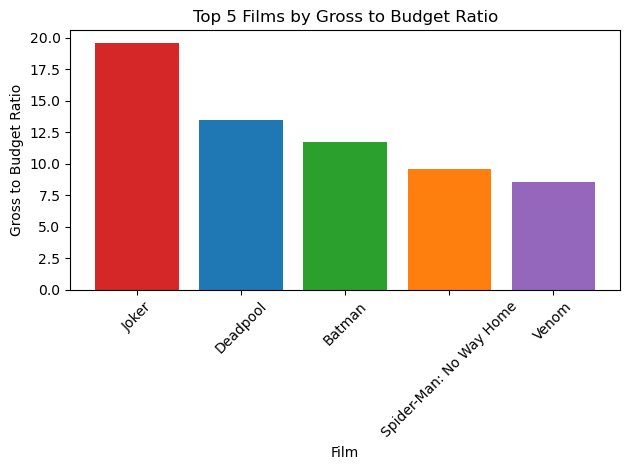

In [80]:
films = top_5_films['Film']
gross_to_budget_ratios = top_5_films['Gross to Budget']

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
fig, ax = plt.subplots()

ax.bar(films, gross_to_budget_ratios, color=bar_colors)

ax.set_ylabel('Gross to Budget Ratio')
ax.set_title('Top 5 Films by Gross to Budget Ratio')
ax.set_xlabel('Film')
ax.set_xticklabels(films, rotation=45) 

plt.tight_layout()
plt.show()

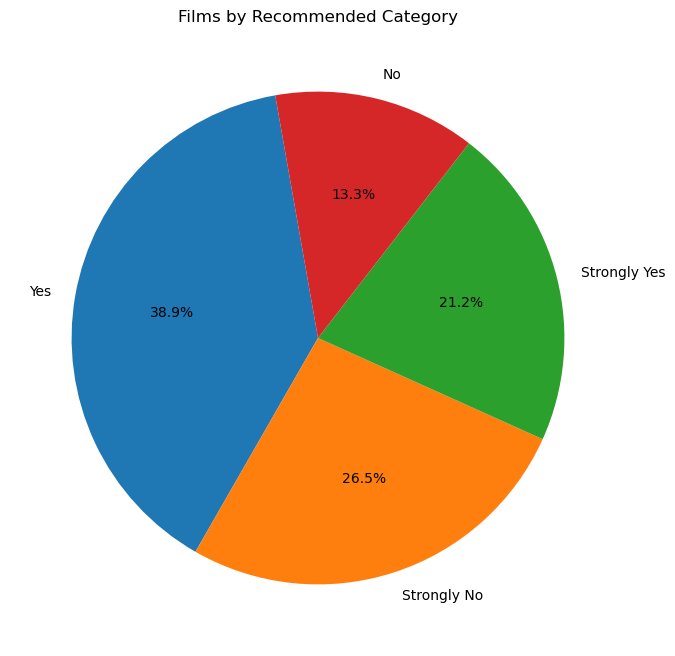

In [92]:
recommended_movies= movie_performance['Recommended'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommended_movies, labels=recommended_movies.index, autopct='%1.1f%%', startangle=100)
plt.title('Films by Recommended Category')
plt.show()
